# K Nearest Neighbors - beggining project 

Welcome to a introductory KNN project, this model is very simple since he just sabe the train dataset and calculates the dinstance to categorize the test dataset.

## Import Libraries

** Import pandas, seaborn and usual libs. **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data
** Read the csv 'KNN_Project_Data' at DataFrame format **

In [6]:
    df = pd.read_csv("KNN_Project_Data")

    ** Look on the DataFrame head.**
   

In [7]:
df.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# exploratory analysis

the data is not real, we can use seaborn to maches all the columns by using the pairplot method. Hue will makes possible to see the graphic sub-divided into True and False

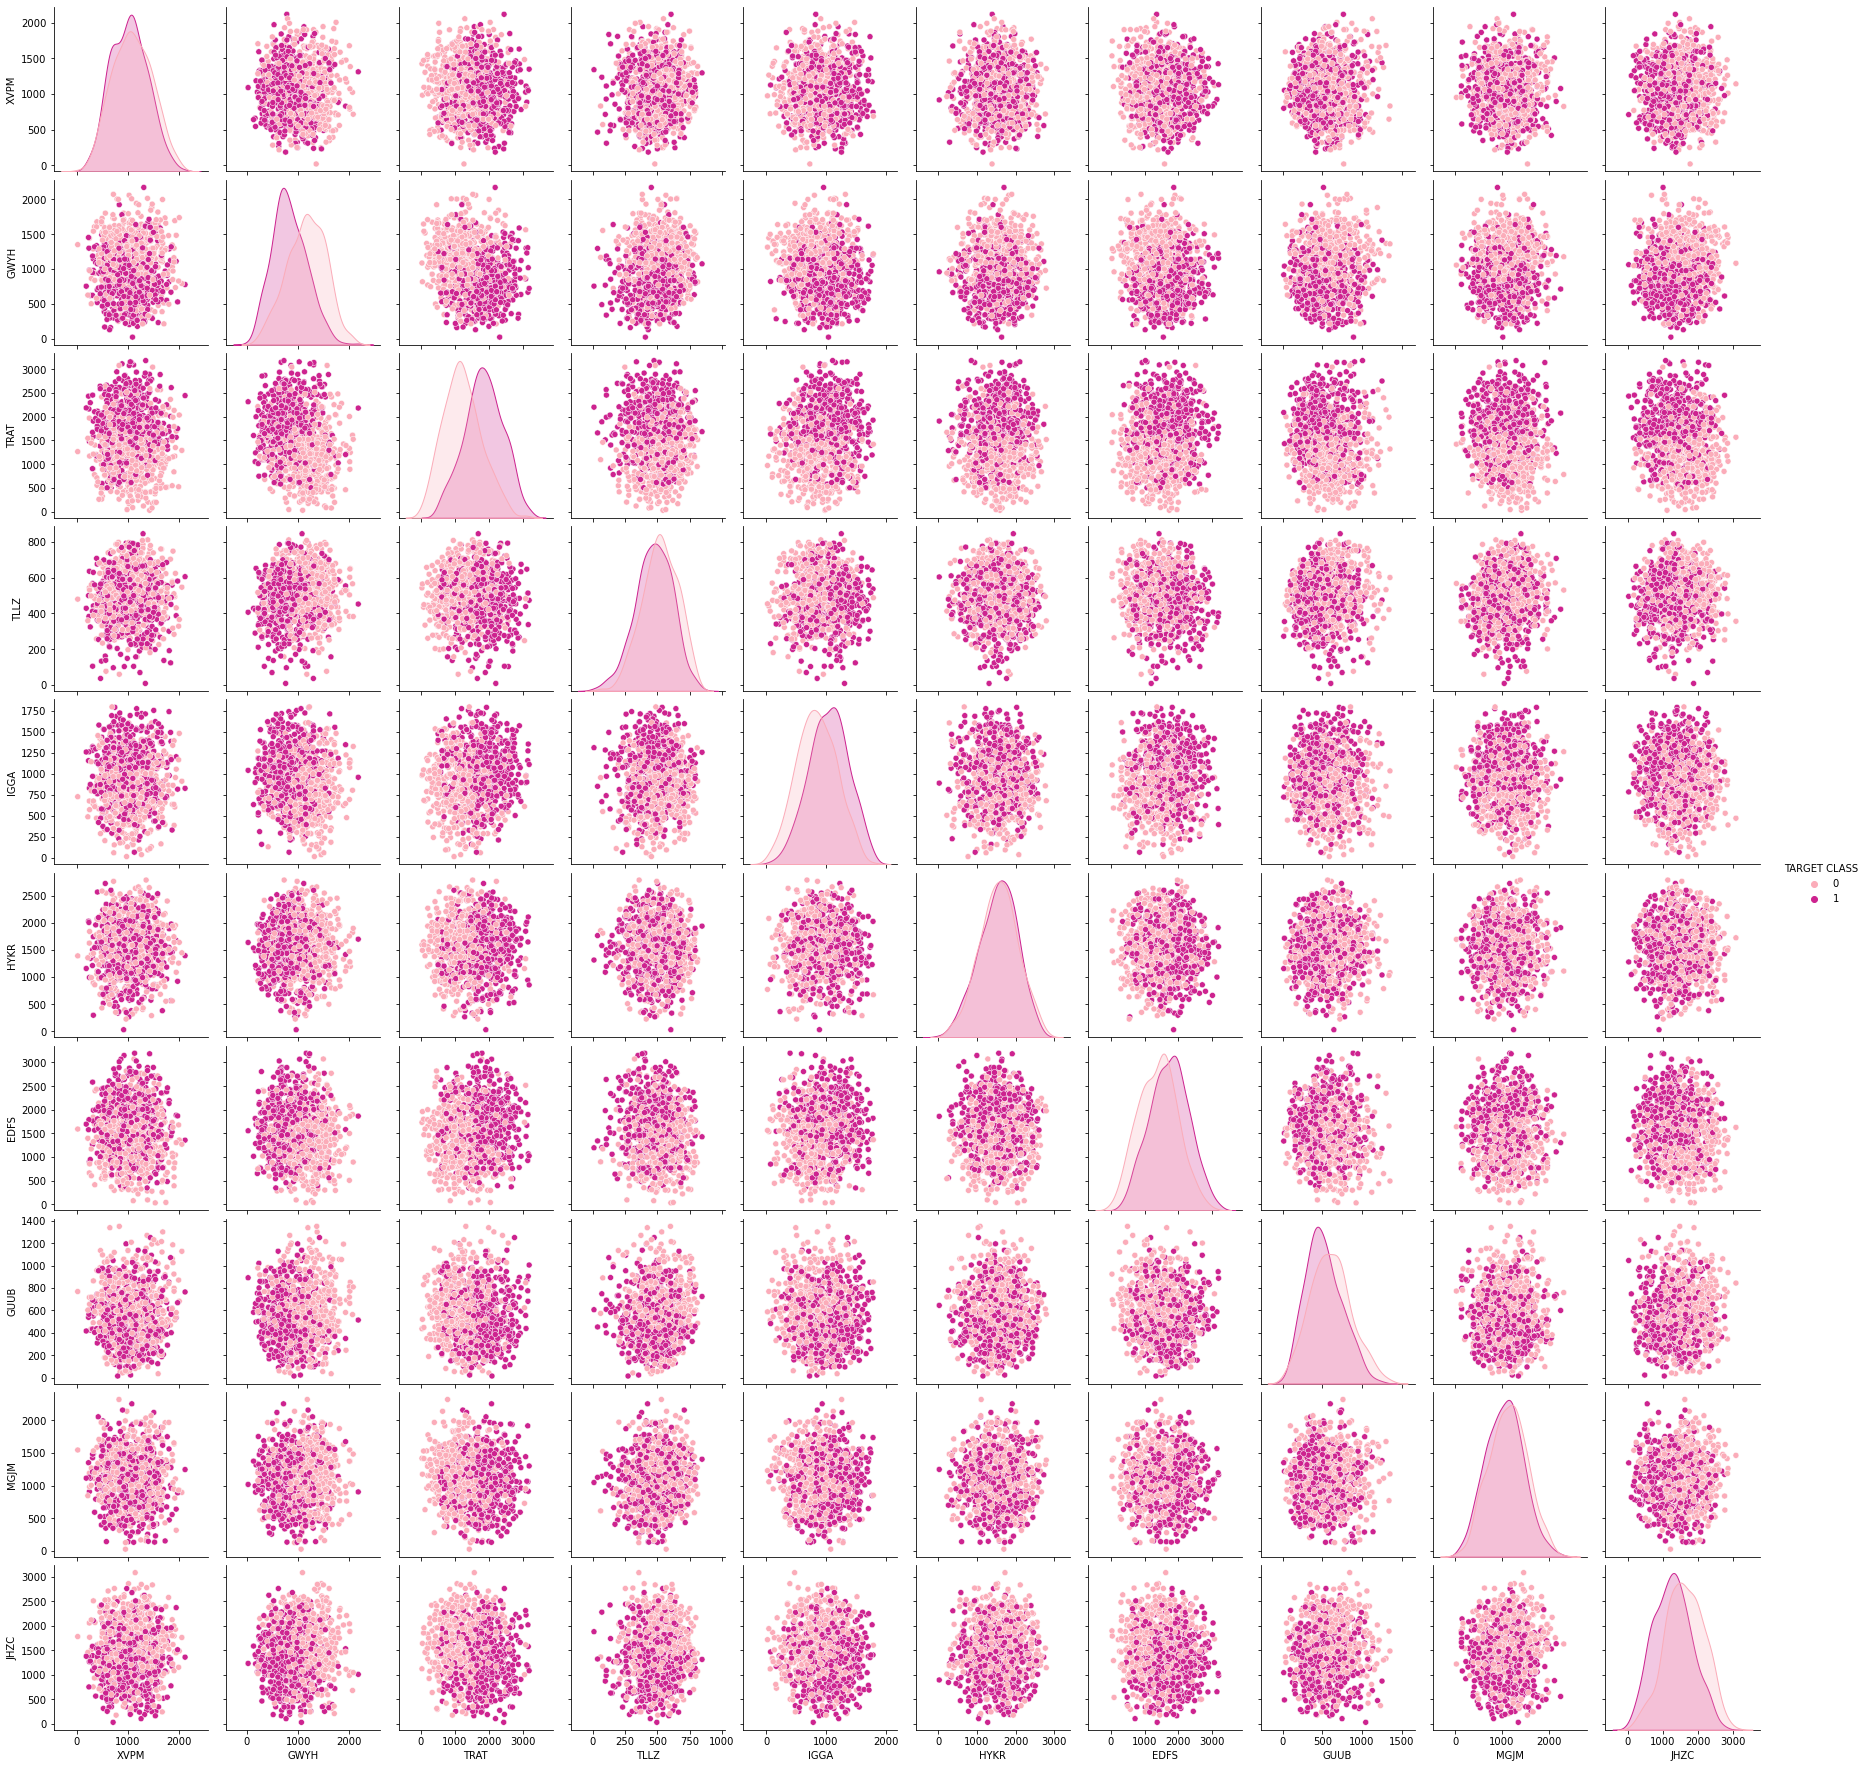

In [10]:
sns.pairplot(df, hue="TARGET CLASS",palette="RdPu")

# Padronizetaion

KNN needs to normalize or padronize the data because it will get the dinstance as a relavant information if you have a column that have biggers disntance than other just because of they realative value this model would 

** Import StandardScaler from Scikit-learn. **

In [11]:
from sklearn.preprocessing import StandardScaler

** Create the object. **

In [12]:
scaler = StandardScaler()

** Using the method fit() to train the model **

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

** Using the method .transform () to transform the parametry in a padronized version. **
now i can use scaler to transform my data and padronize it remembering to drop the "Target class" column

In [14]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

the result data is output into numpy array and we need to transform it in a dataframe and get the columns from the original df dropping the last column of "TARGET CLASS"

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train test

** now we will use the train_test_split to get the train and the test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['TARGET CLASS'],
                                                    test_size=0.30)

# Ussing the KNN

** Import  KNeighborClassifier from scikit learn. **

In [18]:
from sklearn.neighbors import KNeighborsClassifier

** Creating a instance from model KNN with n_neighbors = 1 wich means it will only look the distance of the closest train information and get its classification to himself **

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

Fitting the model

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions

Getting the test dataset we will predict our outputs

In [21]:
pred = knn.predict(X_test)

the final imports from sklearn to we finish the job

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

the confusion matrix show us the True positives, True negatives, False positive and False negatives

In [23]:
print(confusion_matrix(y_test,pred))

[[114  46]
 [ 38 102]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.69      0.73      0.71       140

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



we got a 72% score but we not sure if the neighbors = 1 is good enough we need to make a error function to valuate it

In [29]:
error_rate = []

for x in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Error Rate')

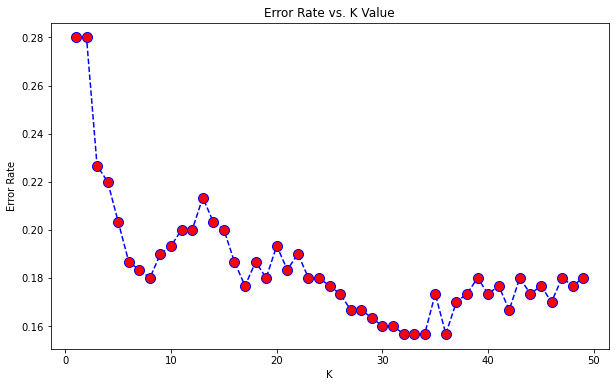

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Trein the model with the best result 

we can see in the graphic that the best prediction are fom the neighborn 32 to 34 lets see the final result for out model


In [31]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       160
           1       0.80      0.89      0.84       140

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300

